# Normal_Gravity_correction

by: Lu Li, UWA

Here, we show how to use 'boule' https://www.fatiando.org/boule/latest/ to correct normal gravity

See https://www.fatiando.org/harmonica/latest/user_guide/gravity_disturbance.html#gravity-disturbance and https://github.com/LL-Geo/PFToolbox/blob/master/Gravity%20disturbance%20and%20FAA.ipynb for more information

In [1]:
# Load necessary package 
import boule as bl
import pandas as pd
import pyproj
import matplotlib.pyplot as plt
import numpy as np

# Read in Gravity data after drift correction

In [2]:
#Read in Gravity data after drift correction
Data = pd.read_csv('Processed_Data.csv', delimiter=r',')

In [3]:
# Let's looks few line of the data
Data.head(5)

,Unnamed: 0,Station,Line,seconds_elapsed,RawGrav,Lon,Lat,Height_Sea_Level_m,Height_Ellipsoid_m,grav_drift
0,0,2000,100,9885.25,3384.535987,119.643221,-32.363165,379.000000,353.310000,4.547474e-13
1,1,2001,100,1246.00,3384.674600,119.643143,-32.362728,379.000000,353.310000,8.967932e-02
2,2,2002,100,2107.00,3384.531100,119.642952,-32.362442,379.000000,353.310000,-4.894393e-02
3,3,2003,100,2582.00,3384.442050,119.642685,-32.361912,380.000000,354.310000,-1.353035e-01
4,4,2004,100,3108.00,3384.501600,119.642609,-32.361549,380.056885,354.366885,-7.277421e-02


# Compute normal gravity at each location
Boule implements closed-form formula of Li & Gotze, 2001 which can calculate normal gravity at any latitude and (geometric) height.

Li, X. and H. J. Gotze, 2001, Tutorial: Ellipsoid, geoid, gravity, geodesy, and geophysics, Geophysics, 66(6), p. 1660-1668, doi:10.1190/1.1487109

In [4]:
normal_gravity = bl.WGS84.normal_gravity(Data.Lat, Data['Height_Ellipsoid_m'])
disturbance = Data['grav_drift'] - normal_gravity + 9.794e5

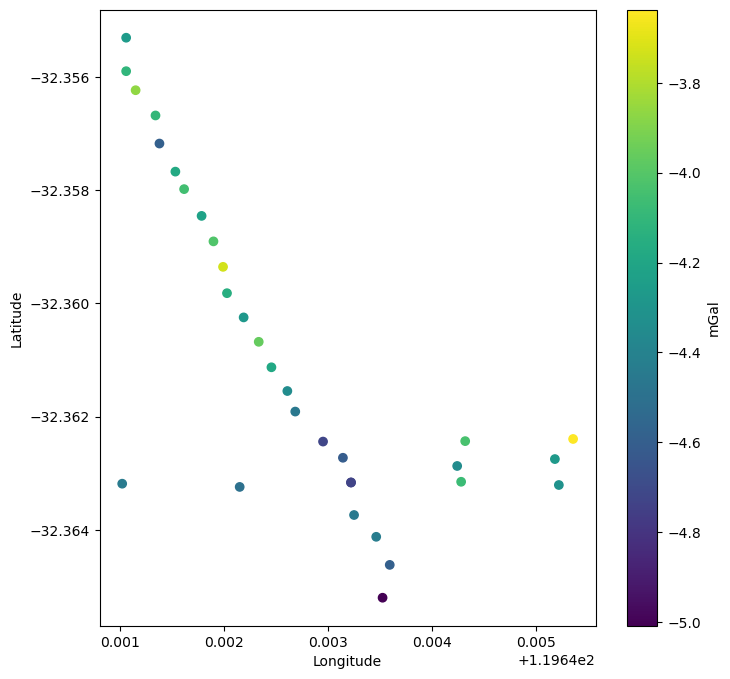

In [5]:
plt.figure(figsize=(8, 8))
# Scatter plot for Combine_data with color mapping based on 'GRAV.' values
sc = plt.scatter(Data['Lon'], Data['Lat'], c=disturbance, cmap='viridis')
# Add labels and legend
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# Add colorbar to the plot
plt.colorbar(sc, label='mGal')
# Show the plot
plt.show()

In [6]:
# Save the Data to a CSV file
data_array = np.column_stack((Data['Lon'], Data['Lat'], Data['Height_Sea_Level_m'], Data['Height_Ellipsoid_m'], Data['grav_drift'], disturbance))
df = pd.DataFrame(data_array, columns=['Lon', 'Lat', 'Height Sea Level','Height_Ellipsoid', 'Total Gravity', 'Free Air Disturbance'])
df.to_csv('Free_Air_Grav_CAGE_FIELD.csv', index=False)

In the next notebook, we will show how to remove topography signal to get Bouguer gravity (aka topography free disturbance)